# Heart Disease Prediction

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
from numpy import percentile
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
import math
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
import warnings
warnings.filterwarnings('ignore')

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
df_heart = pd.read_csv('C:/Users/yuri.lacerda/Desktop/Portfolio/cleveland.csv', header = None)
df_heart.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 
              'thal', 'target']
# Variables
print("Heart Disease Prediction has {} data points with {} variables each.".format(*df_heart.shape))

Heart Disease Prediction has 303 data points with 14 variables each.


## Data description

he dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-years risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

The dataset consists of 779 individuals data. There are 15 columns in the dataset, however the first column name is not a good parameter as far as machine learning is considered so, there are effectively 14 columns.

Age : displays the age of the individual.

Sex : displays the gender of the individual using the following format : 1 = male 0 = female.

Chest-pain type : displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non - anginal pain 4 = asymptotic

Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)

Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)

Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)

Resting ECG : 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

Max heart rate achieved : displays the max heart rate achieved by an individual.

Exercise induced angina : 1 = yes 0 = no

ST depression induced by exercise relative to rest : displays the value which is integer or float.

Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping

Number of major vessels (0-3) colored by flourosopy : displays the value as integer or float.

Thal : displays the thalassemia : 3 = normal 6 = fixed defect 7 = reversable defect

Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1,2,3,4 = present.

## Explore data

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
# data types of columns
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [6]:
# Check missing value
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

## Prepare Dataset for Modeling

In [7]:
df_heart['target'] = df_heart.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df_heart['sex'] = df_heart.sex.map({0: 'female', 1: 'male'})
df_heart['thal'] = df_heart.thal.fillna(df_heart.thal.mean())
df_heart['ca'] = df_heart.ca.fillna(df_heart.ca.mean())

In [8]:
# Check what percentage of each column's data is missing
df_heart.isnull().sum()/len(df_heart)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [9]:
## Remove Outlier
def outliers(column):
    # calculate interquartile range
    q25, q75 = percentile(df_heart[column], 25), percentile(df_heart[column], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df_heart.drop(df_heart.loc[df_heart[column] > upper].index, inplace=True)

In [10]:
for column in df_heart:
    if df_heart[column].dtype != object:
        outliers(column)

## Descriptive Statistics

In [11]:
df_heart.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,234.000000,234.000000,234.000000,234.000000,234.0,234.000000,234.00000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,53.367521,3.141026,128.820513,242.038462,0.0,0.923077,150.75641,0.307692,0.927778,1.542735,0.474430,4.584334,0.418803
std,9.224057,0.963600,15.307781,44.244767,0.0,0.994870,23.02146,0.462528,1.029958,0.586225,0.692343,1.919675,0.494421
min,29.000000,1.000000,94.000000,131.000000,0.0,0.000000,71.00000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,45.250000,2.000000,120.000000,210.250000,0.0,0.000000,136.50000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,3.000000,130.000000,239.000000,0.0,0.000000,155.00000,0.000000,0.600000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,4.000000,140.000000,269.000000,0.0,2.000000,168.75000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,76.000000,4.000000,170.000000,360.000000,0.0,2.000000,202.00000,1.000000,4.000000,3.000000,2.000000,7.000000,1.000000


## Countplot of people based on their age and target

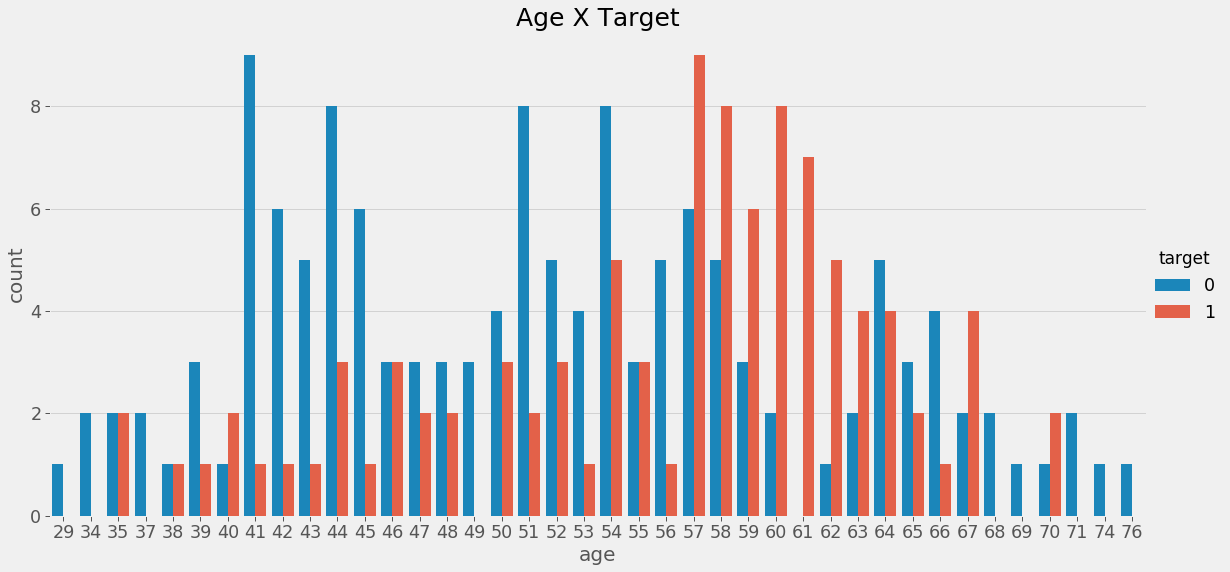

In [12]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df_heart, x = 'age', hue = 'target', order = df_heart['age'].sort_values().unique(), 
            height=8,  aspect=16/8)
plt.title('Age X Target')
plt.show()

## Countplot of people based on their sex and target

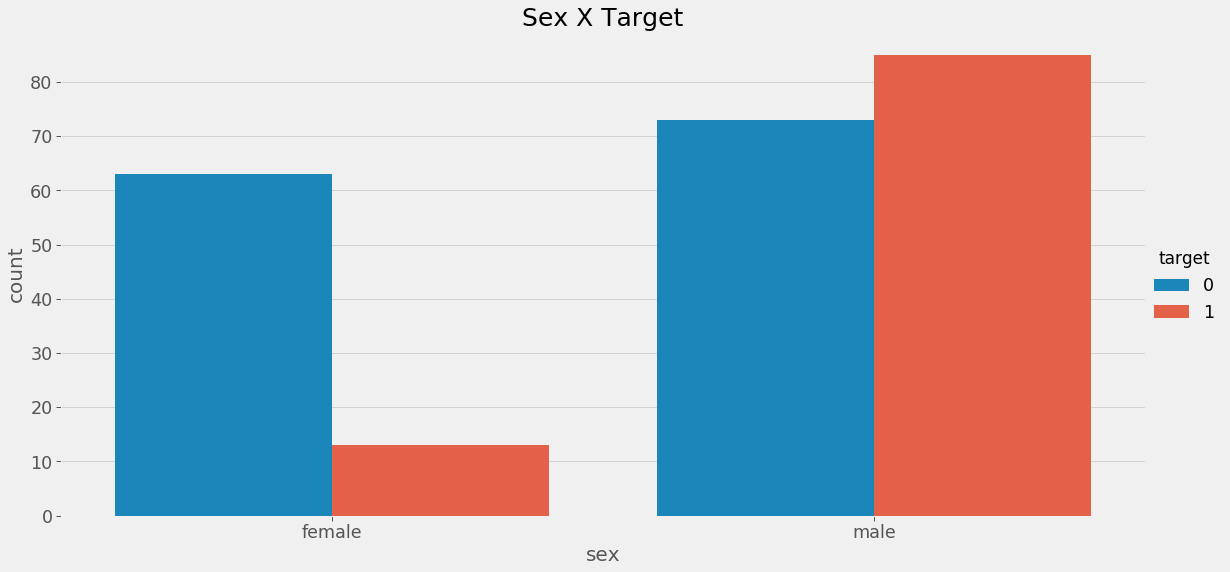

In [13]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df_heart, x = 'sex', hue = 'target', order = df_heart['sex'].sort_values().unique(), 
            height=8,  aspect=16/8)
plt.title('Sex X Target')
plt.show()

## Check Multicollinearity

In [14]:
# Steps to remove redundant values
mask = np.zeros_like(df_heart.corr())
mask[np.triu_indices_from(mask)] = True

## Correlation Matrix

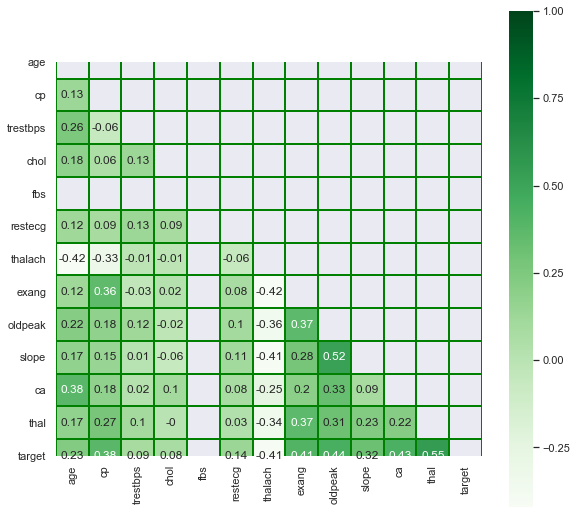

In [15]:
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df_heart.corr().round(2), square=True, cmap='Greens', annot=True, linecolor='Green', linewidths=1.0, mask=mask);

In my heatmap analysis I defined a high correlation cut to + - 0.75. No variable was found with this value.

## Shuffle and Split Data

In [16]:
df_heart['sex'] = df_heart.sex.map({'female': 0, 'male': 1})

X = df_heart.iloc[:, :-1].values
y = df_heart.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:5])

[[-1.02001573 -1.47291939 -0.16434882 -1.35271348 -2.21044736  0.
  -0.9479094   1.02923942 -0.6873434  -0.30833625  0.78002597 -0.70898726
  -0.84057041]
 [ 1.83162293 -1.47291939 -1.22411534  1.99260337  1.33850415  0.
  -0.9479094   0.46570766 -0.6873434  -0.50647672 -0.89658158  2.1726763
  -0.84057041]
 [ 0.66984422  0.67892378  0.89541771  0.70594305  1.14011555  0.
   1.06639807  0.81249643 -0.6873434   0.28608518  0.78002597  2.1726763
   1.2413722 ]
 [-0.59755074  0.67892378 -1.22411534  0.06261288  0.08204305  0.
   1.06639807  1.24598241 -0.6873434  -0.7046172   0.78002597 -0.70898726
  -0.84057041]
 [ 0.56422797  0.67892378 -2.28388187  0.31994495 -0.8217272   0.
  -0.9479094   0.46570766 -0.6873434  -0.11019577 -0.89658158  2.1726763
  -0.84057041]]


## Create Model

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing the Model

In [18]:
y_pred = classifier.predict(X_test)

## Predicting the score

In [19]:
score = classifier.score(X_test, y_test)
print()
print("Prediction score is:",score)


Prediction score is: 0.8297872340425532


## Confusion Matrix

In [20]:
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8449197860962567
Accuracy for test set for Logistic Regression = 0.8297872340425532


## Classification Report

In [21]:
print()
print("Classification Report is:\n\n",classification_report(y_test,y_pred))


Classification Report is:

               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.81      0.72      0.76        18

    accuracy                           0.83        47
   macro avg       0.83      0.81      0.82        47
weighted avg       0.83      0.83      0.83        47



## Plotting the confusion matrix

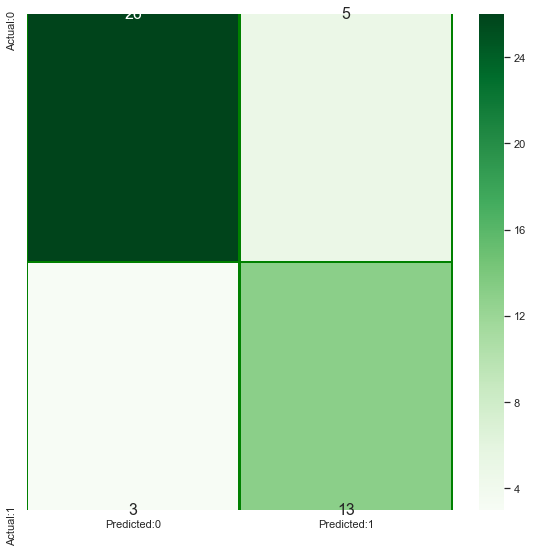

In [22]:
conf_matrix = pd.DataFrame(data = cm_test,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Green", linewidths=1.5, annot_kws={"size": 16}) 
plt.show()

## ROC curves

In [23]:
def plot_roc_curve(fpr, tpr):
    #plt.figure(figsize = (8, 5)) 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

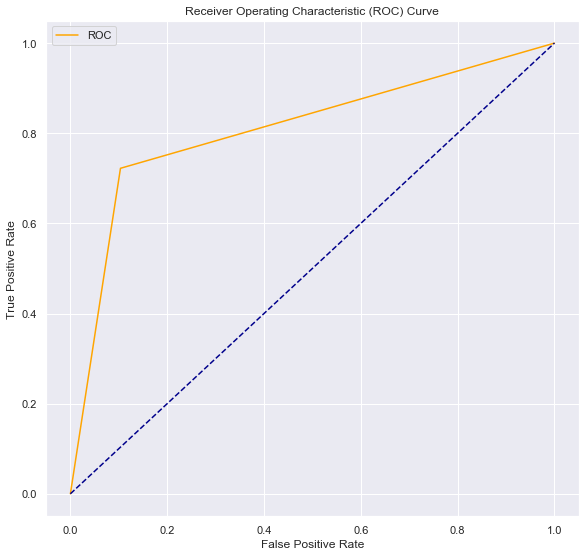

In [24]:
fpr, tpr, thresholds = roc_curve(y_test,  y_pred)
plot_roc_curve(fpr, tpr)